In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r'C:\Users\modyr\Desktop\Youtube Analysis\Youtube_Data_Analysis\yt_data.csv')

df.head()

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count
0,wsCmWZSASes,"Tank vs Roach FIGHT HIGHLIGHTS: March 1, 2025 ...",Gervonta Davis and Lamont Roach fought an epic...,2025-03-02T06:35:42Z,UCWXYAGB9SadlL6p5Bb66wWw,Premier Boxing Champions,17,"['Boxing', 'Gervonta Davis', 'Gervonta Davis v...",PT3M22S,hd,False,2486351,23841,0,0,6725
1,mS8W6NY6QjQ,FULL SEGMENT: John Cena SELLS OUT and ruthless...,After Undisputed WWE Champion Cody Rhodes emph...,2025-03-02T05:03:43Z,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,17,"['Cody Rhodes', 'John Cena', 'The Rock', 'Trav...",PT17M23S,hd,True,3695350,136355,0,0,23592
2,kmXkr7I8gYo,Tank Davis vs Roach FIGHT HIGHLIGHTS | Premier...,"In a back and forth battle At Barclays Center,...",2025-03-02T05:45:58Z,UC2Ss8mXyksW2SQfhhUpgR2g,Sports On Prime,17,[],PT6M10S,hd,False,505161,4137,0,0,2392
3,fpBqWFhefNA,Gervonta Davis FULL Post Fight Press Conferenc...,In this video we hear from Gervonta Davis afte...,2025-03-02T07:56:54Z,UCwdVyruxCCqMR4DtPLhtwlg,Fight Hub TV,17,"['boxing', 'fight hub', 'fight hub tv', 'fight...",PT14M15S,hd,False,576349,7553,0,0,4290
4,1mtJvsfAtF0,Sabrina Carpenter - Espresso/Bed Chem (Live at...,Sabrina Carpenter performs “Espresso” & “Bed C...,2025-03-02T02:30:47Z,UC4mYKePIas5YgGfYZ2J2OxQ,SabrinaCarpenterVEVO,10,"['Sabrina Carpenter', 'Island Records', 'Pop']",PT5M13S,hd,True,1529450,90686,0,0,4110


In [3]:
df.columns

Index(['video_id', 'title', 'description', 'published_at', 'channel_id',
       'channel_title', 'category_id', 'tags', 'duration', 'definition',
       'caption', 'view_count', 'like_count', 'dislike_count',
       'favorite_count', 'comment_count'],
      dtype='object')

In [9]:
top_videos_by_likes = df.pivot_table(index=['title', 'channel_title'], 
                                     values='like_count'
                                     ).sort_values('like_count', ascending=False).head(10)

top_videos_by_likes = top_videos_by_likes.reset_index()
top_videos_by_likes

,title,channel_title,like_count
0,I Spent 100 Hours Inside The Pyramids!,MrBeast,4613046.0
1,Kendrick Lamar's Apple Music Super Bowl Halfti...,NFL,3039016.0
2,"JENNIE, Doechii - ExtraL (Official Video)",JennieRubyJaneVEVO,1621550.0
3,100 People Trapped Inside 100 Circles For $500...,MrBeast,1260536.0
4,LISA - FUTW (Vixi Solo Version) (Official Musi...,LLOUD Official,1174983.0
5,G-DRAGON - TOO BAD (feat. Anderson .Paak) (Off...,OfficialGDRAGON,568160.0
6,JENNIE - Ruby (Official Album Sampler),JENNIE,554752.0
7,IS THIS THE BEST BRAWLER EVER?!,Brawl Stars,507157.0
8,Hearts2Hearts 하츠투하츠 'The Chase' MV,SMTOWN,479860.0
9,G-DRAGON - DRAMA (Official Video),OfficialGDRAGON,427404.0


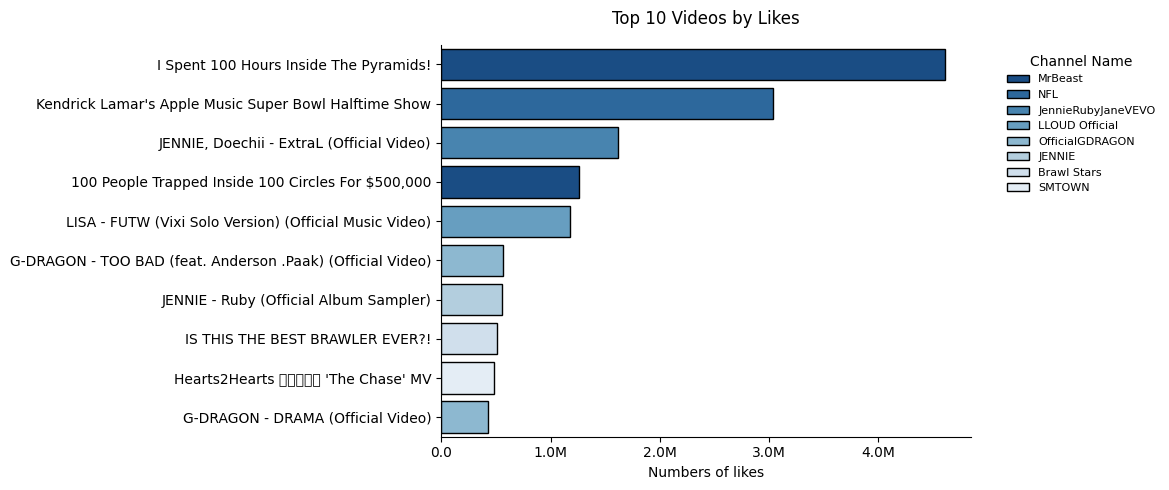

In [12]:
plt.figure(figsize=(12, 5))
sns.barplot(data=top_videos_by_likes,
            x='like_count',
            y='title',
            palette='Blues_r',
            edgecolor='k', 
            hue='channel_title',
            dodge=False,
            )

def num_format(x, pos):
    if x >= 1e6:
        return '{:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        return '{:1.1f}K'.format(x*1e-3)
    else:
        return '{:1.1f}'.format(x)

# Applying the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(num_format))

plt.title('Top 10 Videos by Likes', pad=15)
plt.xlabel('Numbers of likes')
plt.ylabel("")
plt.legend(title='Channel Name', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, title_fontsize=10, frameon=False)

sns.despine()
plt.tight_layout()
plt.show()

**Key Insights:**  

1. **MrBeast’s Challenge Content Dominates Positive Sentiment**:  
   - MrBeast’s "I Spent 100 Hours Inside The Pyramids!" leads with **~4.5M likes**, reaffirming the appeal of high-concept, immersive challenges that resonate emotionally with audiences.  

2. **Live Events & Sports Content Spark Broad Approval**:  
   - The NFL’s Super Bowl Halftime Show ranks second (~3M likes), highlighting how live events and performances garner widespread approval, likely due to their cultural relevance and entertainment value.  

3. **K-Pop Music Videos Drive Consistent Engagement**:  
   - Multiple entries from **Jennie**, **Lisa**, and **G-DRAGON** (SMTOWN/OfficialGDRAGON channels) secure mid-tier rankings (~500K–1.5M likes). This reflects the global fandom’s loyalty and tendency to engage positively with official releases.  

4. **Contrast Between Likes and Comments**:  
   - While MrBeast’s video tops likes, the NFL’s content generates more comments (earlier analysis). This suggests **challenges inspire admiration** (likes), while **live events provoke discussion** (comments).  

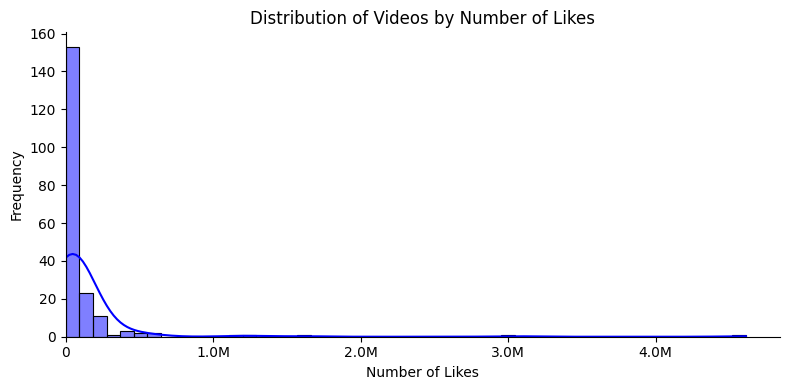

In [13]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df,
             x='like_count',
             bins=50,
             color='blue',
             kde=True,
             edgecolor='k'
             )

# Function to format the values
def num_format(x, pos):
    if x >= 1e6:
        return '{:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        return '{:1.0f}K'.format(x*1e-3)
    else:
        return '{:1.0f}'.format(x)

# Applying the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(num_format))

plt.title('Distribution of Videos by Number of Likes')
plt.ylabel('Frequency')
plt.xlabel('Number of Likes')
plt.xlim(0, None)
sns.despine()
plt.tight_layout()
plt.show()


**Key Insights:**  

1. **Extreme Skewness in Engagement**:  
   - The chart reveals a **power-law distribution**, where **a tiny fraction of videos dominate like activity**. Most videos (~150) receive fewer than 50K likes, while a handful (e.g., MrBeast’s pyramid challenge) garner over 4M likes. This mirrors the "long-tail" trend observed in views and comments, emphasizing that **only outliers achieve massive engagement**.  

2. **Algorithmic Amplification of Viral Content**:  
   - The steep drop-off post-100K likes highlights YouTube’s algorithmic bias toward promoting content that gains initial traction. Videos with rapid early engagement enter a feedback loop, receiving more visibility and likes, while others stagnate.  

3. **Contrast Between Top-Liked and Average Videos**:  
   - While MrBeast’s challenge video dominates likes (~4.5M), most videos fail to surpass 50K. This underscores the **rarity of viral success** and the challenge for creators to break through the noise.  